In [1]:
import os
import datetime
import json
import re

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

plt.rcParams['figure.figsize'] = [6.9,2.3]

import numpy as np

from verify_dataset_hash import get_repo_sha1_and_diff

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
# matplotlib.rcParams['lines.marker']  #None
matplotlib.rcParams['lines.markersize'] = 2 #6.0
matplotlib.rcParams['lines.linewidth'] = 1   # 1.5
matplotlib.rcParams['figure.constrained_layout.use'] = True

In [3]:
def show_result_distance(distance, accuracy, 
                        target_png_path=None, title="Information in the Distance", guessing_level_percent=None,
                        ax=None, label="UNSPECIFIED",
                        color=None):
    """
    This method plots the end result for the main_distance script.
    """
    if ax is None:
        fig, ax = plt.subplots()

    ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.yaxis.set_major_locator(MultipleLocator(20))

    ax.xaxis.set_minor_locator(AutoMinorLocator(1))
    #ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    axesthickness = 1

    ax.xaxis.set_tick_params(which='major', size=3, width=axesthickness, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=2, width=axesthickness, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=3, width=axesthickness, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=2, width=axesthickness, direction='in', right='on')

    ax.grid(which='major', color='#CCCCCC')
    ax.grid(which='minor', color='#CCCCCC')
    
    print(f'{distance=}, {accuracy=}')
    
    if len(accuracy.shape) == 2:
        average_acc = np.mean(accuracy, axis=1)
        loosely_dashed_linestyle = (0, (5, 10))
        curr_line, = ax.plot(distance, average_acc, 
                             linestyle=loosely_dashed_linestyle, color=color) #, label=f"avg. {label}")
        distance = np.repeat(distance.reshape((len(distance), 1)), accuracy.shape[1], axis=1)

        color = curr_line.get_color()
        ax.plot(distance.flatten(), accuracy.flatten(), 
                label=label, marker='o', markersize=2, linestyle="", color=color)  #color="#01665eff", fillstyle="none")
    else:
        ax.plot(distance.flatten(), accuracy.flatten(), 
                label=label, marker='.', markersize=2, linestyle="-", color=color)  #color="#01665eff", fillstyle="none")
    
    if guessing_level_percent:
        # Adds the 25% (or 50%) accuracy line
        guessing = np.full((1000, 1), guessing_level_percent)
        ax.plot(guessing, 'r')
    
    ax.set_ylim(70, 80)
    ax.set_xlim(1, 29)
    
    ax.legend(loc='best', frameon=True, ) # bbox_to_anchor=(1, 1),)
    ax.set_ylabel("Accuracy (%)")
    ax.set_xlabel("Number of Measurements")
    # ax.yaxis.set_ticks([25,40,60,80,100])
    #ax.set_title(title)

    # change all spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(axesthickness)

    # increase tick width
    ax.tick_params(width=axesthickness)

    font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 10}

    plt.rc('font', **font)
    
    if target_png_path:
        plt.savefig(target_png_path)
    

def convert_data(dictonary):
    accuracy = np.array(list(dictonary.values())) * 100
    distances_from_keys = list(dictonary.keys())
    distances_from_keys = [float(re.findall("\d+$", i)[0]) for i in distances_from_keys]
    
    return np.array(distances_from_keys), accuracy

In [4]:
def load_plotinfo_from_file(json_path):
    with open(json_path, 'r') as file:
        json_contents = json.load(file)
          
    return json_contents

In [5]:
def plotinfo_from_dict(json_contents):
    dict_test_accuracies = json_contents["test_accuracies"]
    dict_val_accuracies = json_contents["validation_accuracies"]
    try:
        n_classes = json_contents['n_classes']
    except:
        print(f"Warning. Failed to interpret n_classes from json file! Set to default.")
        n_classes = 0
    guessing_level_percent = 50 if n_classes == 2 else 25

    title = ""#f"Advantage of more training data ({n_classes} classes) from {path}"
    return dict_test_accuracies, dict_val_accuracies, guessing_level_percent, title

# Single graph

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


distance=array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28.]), accuracy=array([[71.06619303, 70.53231939, 70.59588733, 71.12623205, 70.6409166 ],
       [71.7166158 , 71.42785671, 71.85170361, 72.45209386, 72.09185971],
       [73.03247111, 72.19331599, 72.85235403, 73.55280933, 73.05748737],
       [74.31330365, 74.06944166, 74.37834592, 74.80862561, 74.29829389],
       [74.3183069 , 73.82429458, 74.31330365, 74.84364837, 74.04312803],
       [74.60349227, 74.76485892, 74.44839145, 75.11382399, 74.73858008],
       [75.78425977, 75.31518911, 75.73422725, 76.83994596, 76.05943864],
       [74.62850853, 74.58975385, 74.40336219, 75.15885325, 74.64852154],
       [75.63416221, 75.05503302, 75.41902236, 76.14949717, 76.06944514],
       [76.324611  , 75.94056434, 76.0844549 , 76.70485816, 76.17951669],
       [75.63416221, 74.69981989, 75.2689248 , 76.00440286, 75.32396057],
       [76

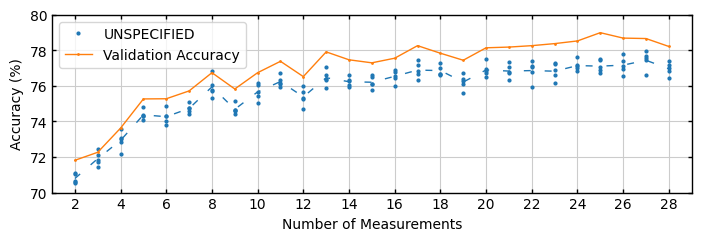

In [6]:
path = './result_files/vary_training_data_amount/result_vary_raining_data_20220705-1112.json'
dict_test_accuracies, dict_val_accuracies, guessing_level_percent1, title1 = plotinfo_from_dict(load_plotinfo_from_file(path))

fig, ax = plt.subplots()
show_result_distance(*convert_data(dict_test_accuracies), 
                     target_png_path=None, title=title1, guessing_level_percent=guessing_level_percent1, ax=ax)

show_result_distance(*convert_data(dict_val_accuracies), 
                     target_png_path=None, title=title1, guessing_level_percent=guessing_level_percent1, ax=ax, label='Validation Accuracy')

# Multiple graphs

Warning. Failed to interpret n_classes from json file! Set to default.
distance=array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]), accuracy=array([[71.88172312, 70.46728037, 71.02616701, 72.44709061, 72.36703858],
       [74.41837194, 73.97938763, 74.22824836, 75.06379146, 74.43838495],
       [75.12883374, 74.87992796, 75.15885325, 75.71921749, 75.12883374],
       [75.69920448, 75.53532119, 75.94936709, 76.07945164, 75.71921749],
       [76.10947116, 75.50030018, 75.92435083, 76.59978986, 75.70921099],
       [76.50472807, 75.33520112, 75.93936058, 76.2195427 , 76.36463701],
       [76.52974433, 76.20072043, 76.71486466, 77.31525492, 76.70986141],
       [76.70986141, 76.04062437, 77.04007605, 77.39530695, 76.73487767],
       [77.1501476 , 76.97618571, 77.30024516, 77.45034272, 76.90999149],
       [77.35528093, 76.76605964, 77.56541752, 77.9856907 , 77.5053785 ],
       [77.21018662, 76.83109866, 77.25521589, 77.66548256, 76.87496873],
       [77.42032321, 76.8461

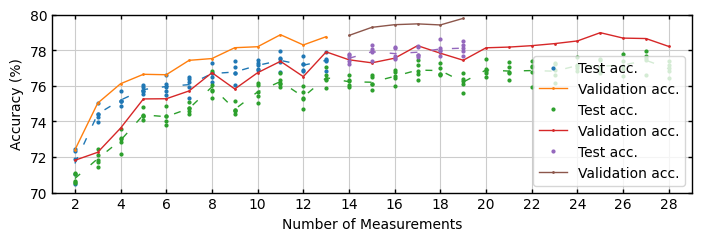

In [7]:
#path = "/project/ag-weinfurter/crypto/PhDs/Adomas/EmissionSecurityMeasuredData/Distance_precise/test_accuracy_20220331-1436.json"
fig, ax = plt.subplots()

json_paths = [
    './result_files/vary_training_data_amount/result_vary_raining_data_20220705-1446.json',
    './result_files/vary_training_data_amount/result_vary_raining_data_20220705-1112.json', 
    "./result_files/vary_training_data_amount/result_vary_raining_data_20220705-1718.json",
]
# 1446 with data agumentation
# 1112 no data augmentation
# 1718 with augmentation

info_dicts = [load_plotinfo_from_file(path) for path in json_paths]
#info_dicts[1].update(load_plotinfo_from_file(
 #   ))

for info_dict in info_dicts:
    dict_test_accuracies, dict_val_accuracies, guessing_level_percent, title = plotinfo_from_dict(info_dict)
    show_result_distance(*convert_data(dict_test_accuracies), 
                         target_png_path=None, title="Multiple",
                         guessing_level_percent=guessing_level_percent, ax=ax, label=f"Test acc.")
    
    show_result_distance(*convert_data(dict_val_accuracies), 
                         target_png_path=None, title="Multiple",
                         guessing_level_percent=guessing_level_percent, ax=ax, label=f"Validation acc.")

In [8]:
# manual graph for paper

# 1446 with data agumentation
# 1112 no data augmentation
# 1718 with augmentation

folder = './result_files/vary_training_data_amount/'
data_aug1 = load_plotinfo_from_file(os.path.join(folder, 'result_vary_raining_data_20220705-1446.json'))
data_aug2 = load_plotinfo_from_file(os.path.join(folder, "result_vary_raining_data_20220705-1718.json"))

data_noaug = load_plotinfo_from_file(os.path.join(folder, 'result_vary_raining_data_20220705-1112.json'))

distance=array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28.]), accuracy=array([[71.06619303, 70.53231939, 70.59588733, 71.12623205, 70.6409166 ],
       [71.7166158 , 71.42785671, 71.85170361, 72.45209386, 72.09185971],
       [73.03247111, 72.19331599, 72.85235403, 73.55280933, 73.05748737],
       [74.31330365, 74.06944166, 74.37834592, 74.80862561, 74.29829389],
       [74.3183069 , 73.82429458, 74.31330365, 74.84364837, 74.04312803],
       [74.60349227, 74.76485892, 74.44839145, 75.11382399, 74.73858008],
       [75.78425977, 75.31518911, 75.73422725, 76.83994596, 76.05943864],
       [74.62850853, 74.58975385, 74.40336219, 75.15885325, 74.64852154],
       [75.63416221, 75.05503302, 75.41902236, 76.14949717, 76.06944514],
       [76.324611  , 75.94056434, 76.0844549 , 76.70485816, 76.17951669],
       [75.63416221, 74.69981989, 75.2689248 , 76.00440286, 75.32396057],
       [76

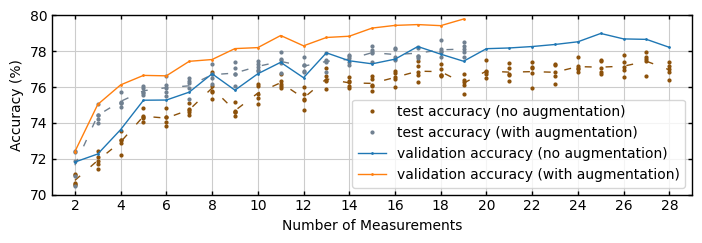

In [9]:
fig, ax = plt.subplots()
annotate_commit_sha1 = False

if annotate_commit_sha1:
    git_sha1, git_diff = get_repo_sha1_and_diff(search_parent_directories=True)
    for d in git_diff:
        assert not d.a_path.endswith("Visualize_Results_Vary_Train_Data.ipynb") , \
            f"Make clean commit so the hash can be added to figure"
    
    ax.text(0.01, 0.99, git_sha1, transform=ax.transAxes, fontsize=8,
            verticalalignment='top',)
    
dict_test_accuracies_noaug = data_noaug["test_accuracies"]
dict_val_accuracies_noaug = data_noaug["validation_accuracies"]


dict_test_accuracies_aug = data_aug1["test_accuracies"]
dict_test_accuracies_aug.update(data_aug2["test_accuracies"])

dict_val_accuracies_aug = data_aug1["validation_accuracies"]
dict_val_accuracies_aug.update(data_aug2["validation_accuracies"])


show_result_distance(*convert_data(dict_test_accuracies_noaug), 
                         target_png_path='./tmp_vary_train_data.pdf', title="",
                         guessing_level_percent=guessing_level_percent, ax=ax, label=f"test accuracy (no augmentation)", color="#8c510aff")

show_result_distance(*convert_data(dict_test_accuracies_aug), 
                         target_png_path='./tmp_vary_train_data.pdf', title="",
                         guessing_level_percent=guessing_level_percent, ax=ax, label=f"test accuracy (with augmentation)", color="slategray")

# validation on top because only one point
show_result_distance(*convert_data(dict_val_accuracies_noaug), 
                     target_png_path='./tmp_vary_train_data.pdf', title="",
                     guessing_level_percent=guessing_level_percent, ax=ax, label=f"validation accuracy (no augmentation)")

show_result_distance(*convert_data(dict_val_accuracies_aug), 
                     target_png_path='./tmp_vary_train_data.pdf', title="",
                     guessing_level_percent=guessing_level_percent, ax=ax, label=f"validation accuracy (with augmentation)",
                     )